In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random
from astropy.table import Table

In [11]:
#load dataset
joke = pd.read_csv("comedy.csv", sep=',')
#preprocessing data
X = joke.content
y = joke.flattened_categories
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, range(len(X)), test_size = 0.2, random_state = 42)
print(type(X_train))
count_vect1 = CountVectorizer()
count_vect2 = CountVectorizer()

X_train = count_vect1.fit_transform(X_train)
X_test = count_vect1.transform(X_test)
y_train = count_vect2.fit_transform(y_train)
y_test = count_vect2.transform(y_test)
#print(X_train)
print(X_train.shape)
print(y_train.shape)

X_train_array = X_train.toarray()
y_train_array = y_train.toarray()

print(X_test.shape)
print(y_test.shape)

#pd.DataFrame(X_train_array, columns=count_vect1.get_feature_names())
#pd.DataFrame(y_train_array, columns=count_vect2.get_feature_names())

<class 'pandas.core.series.Series'>
(7308, 16099)
(7308, 54)
(1827, 16099)
(1827, 54)


In [5]:
print(X_train_array[0])

[0 0 0 ... 0 0 0]


In [113]:
#classifier = DecisionTreeClassifier(max_depth=40)
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train_array, y_train_array)
print(classifier.tree_.max_depth)

192


In [41]:
pred_train = classifier.predict(X_train_array)
pred_test = classifier.predict(X_test.toarray())

similarity computation: https://www.geeksforgeeks.org/python-percentage-similarity-of-lists/

In [43]:
true_labels = y_test.toarray()
accuracy_train = np.array([])
accuracy_test = np.array([])

for i in range(len(y_train_array)):
  a1 = []
  a2 = []
  for j in range(len(y_train_array[0])):
    if y_train_array[i][j] == 1:
      a1.append(j)
    if pred_train[i][j] == 1:
      a2.append(j)
  similarity = len(set(a1) & set(a2)) / float(len(set(a1) | set(a2))) * 100
  #accuracy_train = np.append(accuracy_train, accuracy_score(y_train_array[i], pred_train[i]))
  accuracy_train = np.append(accuracy_train, similarity)
for i in range(len(true_labels)):
  a1 = []
  a2 = []
  for j in range(len(true_labels[0])):
    if true_labels[i][j] == 1:
      a1.append(j)
    if pred_test[i][j] == 1:
      a2.append(j)
  similarity = len(set(a1) & set(a2)) / float(len(set(a1) | set(a2))) * 100
  accuracy_test = np.append(accuracy_test, similarity)
  #accuracy_test = np.append(accuracy_test, accuracy_score(true_labels[i], pred_test[i]))

print("Training accuracy:", np.mean(accuracy_train), '%')
print("Testing accuracy:", np.mean(accuracy_test), '%')

Training accuracy: 99.94526546250684 %
Testing accuracy: 39.488373786403336 %


Overfitting? (training accuracy >> testing accuracy)

Future tasks: Pruning (deciding the optimal depth of a tree) to avoid overfitting and improve the model eventually

In [47]:
depth = classifier.tree_.max_depth
training_accuracies = []
testing_accuracies = []

for i in range(1, depth+1, 20):
#for i in range(1, 200, 20):
  print(i)
  clf = DecisionTreeClassifier(max_depth=i)
  clf = clf.fit(X_train_array, y_train_array)
  prd_train = clf.predict(X_train_array)
  prd_test = clf.predict(X_test.toarray())

  tr = np.array([])
  tes = np.array([])
  for j in range(len(y_train_array)):
    a1 = []
    a2 = []
    for k in range(len(y_train_array[0])):
      if y_train_array[j][k] == 1:
        a1.append(k)
      if prd_train[j][k] == 1:
        a2.append(k)
    similarity = len(set(a1) & set(a2)) / float(len(set(a1) | set(a2))) * 100
    tr = np.append(tr, similarity)
  for j in range(len(true_labels)):
    a1 = []
    a2 = []
    for k in range(len(true_labels[0])):
      if true_labels[j][k] == 1:
        a1.append(k)
      if prd_test[j][k] == 1:
        a2.append(k)
    similarity = len(set(a1) & set(a2)) / float(len(set(a1) | set(a2))) * 100
    tes = np.append(tes, similarity)
  training_accuracies.append(np.mean(tr))
  testing_accuracies.append(np.mean(tes))
  print(len(training_accuracies))


1
1
21


KeyboardInterrupt: ignored

10


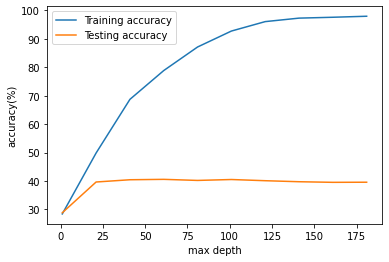

In [46]:
x = np.arange(1, depth+1, 20)
plt.plot(x, training_accuracies, label='Training accuracy') 
plt.plot(x, testing_accuracies, label='Testing accuracy')
plt.xlabel('max depth') 
plt.ylabel('accuracy(%)')
plt.legend() 
plt.plot()
plt.show()

In [ ]:
classifier = DecisionTreeClassifier()
print(classifier.cost_complexity_pruning_path(X_train_array, y_train_array))

{'ccp_alphas': array([0.00000000e+00, 8.44668788e-07, 2.49929395e-06, ...,
       1.50193500e-03, 2.33314125e-03, 1.02770928e-02]), 'impurities': array([2.78740700e-05, 2.87187388e-05, 3.37173267e-05, ...,
       1.13544852e-01, 1.15877993e-01, 1.26155086e-01])}


In [ ]:
classifier = classifier.fit(X_train_array, y_train_array)
print(classifier.feature_importances_)

[0.00000000e+00 2.00908775e-05 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [52]:
classifier = DecisionTreeClassifier()
pruning_path = classifier.cost_complexity_pruning_path(X_train_array, y_train_array)
effective_alphas = pruning_path['ccp_alphas']
impurities = pruning_path['impurities']

In [64]:
len_effective_alphas = len(effective_alphas)
effective_alphas = np.sort(effective_alphas)
#print(effective_alphas[len(effective_alphas)-1])
max_alpha = np.amax(effective_alphas)
min_alpha = np.amin(effective_alphas)
print(np.amax(effective_alphas))
print(np.amin(effective_alphas))
#print(np.mean(effective_alphas))

0.010277092840833571
0.0


In [66]:
training_accuracies = []
testing_accuracies = []
testing_alphas = np.arange(min_alpha, max_alpha, 0.001)
#for i in range(0, len(effective_alphas), int(len(effective_alphas)/10)):
for a in testing_alphas:
  clf = DecisionTreeClassifier(ccp_alpha=a)
  clf = clf.fit(X_train_array, y_train_array)
  prd_train = clf.predict(X_train_array)
  prd_test = clf.predict(X_test.toarray())

  tr = np.array([])
  tes = np.array([])
  for j in range(len(y_train_array)):
    a1 = []
    a2 = []
    for k in range(len(y_train_array[0])):
      if y_train_array[j][k] == 1:
        a1.append(k)
      if prd_train[j][k] == 1:
        a2.append(k)
    similarity = len(set(a1) & set(a2)) / float(len(set(a1) | set(a2))) * 100
    tr = np.append(tr, similarity)
  for j in range(len(true_labels)):
    a1 = []
    a2 = []
    for k in range(len(true_labels[0])):
      if true_labels[j][k] == 1:
        a1.append(k)
      if prd_test[j][k] == 1:
        a2.append(k)
    similarity = len(set(a1) & set(a2)) / float(len(set(a1) | set(a2))) * 100
    tes = np.append(tes, similarity)
  training_accuracies.append(np.mean(tr))
  testing_accuracies.append(np.mean(tes))

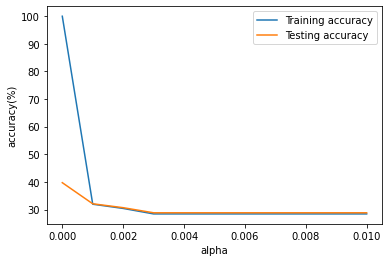

In [67]:
x = np.arange(min_alpha, max_alpha, 0.001)
plt.plot(x, training_accuracies, label='Training accuracy') 
plt.plot(x, testing_accuracies, label='Testing accuracy')
plt.xlabel('alpha') 
plt.ylabel('accuracy(%)')
plt.legend() 
plt.plot()
plt.show()

In [68]:
training_accuracies = []
testing_accuracies = []
testing_alphas = np.arange(0, 0.001, 0.0001)
#for i in range(0, len(effective_alphas), int(len(effective_alphas)/10)):
for a in testing_alphas:
  clf = DecisionTreeClassifier(ccp_alpha=a)
  clf = clf.fit(X_train_array, y_train_array)
  prd_train = clf.predict(X_train_array)
  prd_test = clf.predict(X_test.toarray())

  tr = np.array([])
  tes = np.array([])
  for j in range(len(y_train_array)):
    a1 = []
    a2 = []
    for k in range(len(y_train_array[0])):
      if y_train_array[j][k] == 1:
        a1.append(k)
      if prd_train[j][k] == 1:
        a2.append(k)
    similarity = len(set(a1) & set(a2)) / float(len(set(a1) | set(a2))) * 100
    tr = np.append(tr, similarity)
  for j in range(len(true_labels)):
    a1 = []
    a2 = []
    for k in range(len(true_labels[0])):
      if true_labels[j][k] == 1:
        a1.append(k)
      if prd_test[j][k] == 1:
        a2.append(k)
    similarity = len(set(a1) & set(a2)) / float(len(set(a1) | set(a2))) * 100
    tes = np.append(tes, similarity)
  training_accuracies.append(np.mean(tr))
  testing_accuracies.append(np.mean(tes))

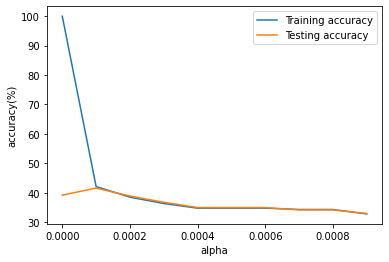

In [69]:
x = np.arange(0, 0.001, 0.0001)
plt.plot(x, training_accuracies, label='Training accuracy') 
plt.plot(x, testing_accuracies, label='Testing accuracy')
plt.xlabel('alpha') 
plt.ylabel('accuracy(%)')
plt.legend() 
plt.plot()
plt.show()

In [116]:
training_accuracies = []
testing_accuracies = []
testing_alphas = np.arange(0, 0.0001, 0.00001)
#for i in range(0, len(effective_alphas), int(len(effective_alphas)/10)):
for a in testing_alphas:
  clf = DecisionTreeClassifier(ccp_alpha=a)
  clf = clf.fit(X_train_array, y_train_array)
  prd_train = clf.predict(X_train_array)
  prd_test = clf.predict(X_test.toarray())

  tr = np.array([])
  tes = np.array([])
  for j in range(len(y_train_array)):
    a1 = []
    a2 = []
    for k in range(len(y_train_array[0])):
      if y_train_array[j][k] == 1:
        a1.append(k)
      if prd_train[j][k] == 1:
        a2.append(k)
    similarity = len(set(a1) & set(a2)) / float(len(set(a1) | set(a2))) * 100
    tr = np.append(tr, similarity)
  for j in range(len(true_labels)):
    a1 = []
    a2 = []
    for k in range(len(true_labels[0])):
      if true_labels[j][k] == 1:
        a1.append(k)
      if prd_test[j][k] == 1:
        a2.append(k)
    similarity = len(set(a1) & set(a2)) / float(len(set(a1) | set(a2))) * 100
    tes = np.append(tes, similarity)
  training_accuracies.append(np.mean(tr))
  testing_accuracies.append(np.mean(tes))

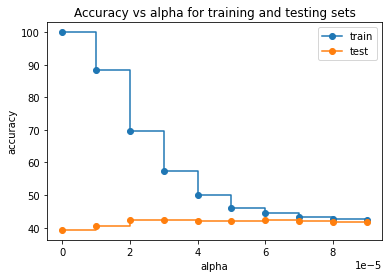

In [118]:
x = np.arange(0, 0.0001, 0.00001)
#x = np.arange(0.00002, 0.00004, 0.000001)
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(x, training_accuracies, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(x, testing_accuracies, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [106]:
training_accuracies = []
testing_accuracies = []
testing_alphas = np.arange(0.00002, 0.00004, 0.000001)
#for i in range(0, len(effective_alphas), int(len(effective_alphas)/10)):
for a in testing_alphas:
  clf = DecisionTreeClassifier(ccp_alpha=a)
  clf = clf.fit(X_train_array, y_train_array)
  prd_train = clf.predict(X_train_array)
  prd_test = clf.predict(X_test.toarray())

  tr = np.array([])
  tes = np.array([])
  for j in range(len(y_train_array)):
    a1 = []
    a2 = []
    for k in range(len(y_train_array[0])):
      if y_train_array[j][k] == 1:
        a1.append(k)
      if prd_train[j][k] == 1:
        a2.append(k)
    similarity = len(set(a1) & set(a2)) / float(len(set(a1) | set(a2))) * 100
    tr = np.append(tr, similarity)
  for j in range(len(true_labels)):
    a1 = []
    a2 = []
    for k in range(len(true_labels[0])):
      if true_labels[j][k] == 1:
        a1.append(k)
      if prd_test[j][k] == 1:
        a2.append(k)
    similarity = len(set(a1) & set(a2)) / float(len(set(a1) | set(a2))) * 100
    tes = np.append(tes, similarity)
  training_accuracies.append(np.mean(tr))
  testing_accuracies.append(np.mean(tes))

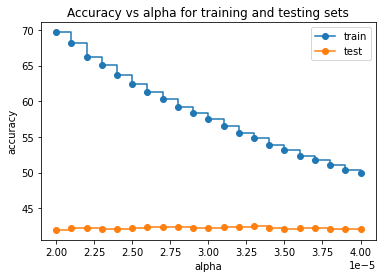

In [114]:
x = np.arange(0.00002, 0.00004, 0.000001)
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(x, training_accuracies, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(x, testing_accuracies, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
training_accuracies = []
testing_accuracies = []
testing_alphas = np.arange(0.000025, 0.00003, 0.000001)
#for i in range(0, len(effective_alphas), int(len(effective_alphas)/10)):
for a in testing_alphas:
  clf = DecisionTreeClassifier(ccp_alpha=a)
  clf = clf.fit(X_train_array, y_train_array)
  prd_train = clf.predict(X_train_array)
  prd_test = clf.predict(X_test.toarray())

  tr = np.array([])
  tes = np.array([])
  for j in range(len(y_train_array)):
    a1 = []
    a2 = []
    for k in range(len(y_train_array[0])):
      if y_train_array[j][k] == 1:
        a1.append(k)
      if prd_train[j][k] == 1:
        a2.append(k)
    similarity = len(set(a1) & set(a2)) / float(len(set(a1) | set(a2))) * 100
    tr = np.append(tr, similarity)
  for j in range(len(true_labels)):
    a1 = []
    a2 = []
    for k in range(len(true_labels[0])):
      if true_labels[j][k] == 1:
        a1.append(k)
      if prd_test[j][k] == 1:
        a2.append(k)
    similarity = len(set(a1) & set(a2)) / float(len(set(a1) | set(a2))) * 100
    tes = np.append(tes, similarity)
  training_accuracies.append(np.mean(tr))
  testing_accuracies.append(np.mean(tes))

In [109]:
classifier = DecisionTreeClassifier(ccp_alpha=0.00005)
classifier = classifier.fit(X_train_array, y_train_array)

pred_train = classifier.predict(X_train_array)
pred_test = classifier.predict(X_test.toarray())

true_labels = y_test.toarray()
accuracy_train = np.array([])
accuracy_test = np.array([])

for i in range(len(y_train_array)):
  a1 = []
  a2 = []
  for j in range(len(y_train_array[0])):
    if y_train_array[i][j] == 1:
      a1.append(j)
    if pred_train[i][j] == 1:
      a2.append(j)
  similarity = len(set(a1) & set(a2)) / float(len(set(a1) | set(a2))) * 100
  #accuracy_train = np.append(accuracy_train, accuracy_score(y_train_array[i], pred_train[i]))
  accuracy_train = np.append(accuracy_train, similarity)
for i in range(len(true_labels)):
  a1 = []
  a2 = []
  for j in range(len(true_labels[0])):
    if true_labels[i][j] == 1:
      a1.append(j)
    if pred_test[i][j] == 1:
      a2.append(j)
  similarity = len(set(a1) & set(a2)) / float(len(set(a1) | set(a2))) * 100
  accuracy_test = np.append(accuracy_test, similarity)
  #accuracy_test = np.append(accuracy_test, accuracy_score(true_labels[i], pred_test[i]))

print("Training accuracy:", np.mean(accuracy_train), '%')
print("Testing accuracy:", np.mean(accuracy_test), '%')

Training accuracy: 46.08982141361041 %
Testing accuracy: 41.93193373769053 %


In [110]:
classifier = DecisionTreeClassifier(ccp_alpha=0.0000284)
classifier = classifier.fit(X_train_array, y_train_array)

pred_train = classifier.predict(X_train_array)
pred_test = classifier.predict(X_test.toarray())

true_labels = y_test.toarray()
accuracy_train = np.array([])
accuracy_test = np.array([])

for i in range(len(y_train_array)):
  a1 = []
  a2 = []
  for j in range(len(y_train_array[0])):
    if y_train_array[i][j] == 1:
      a1.append(j)
    if pred_train[i][j] == 1:
      a2.append(j)
  similarity = len(set(a1) & set(a2)) / float(len(set(a1) | set(a2))) * 100
  #accuracy_train = np.append(accuracy_train, accuracy_score(y_train_array[i], pred_train[i]))
  accuracy_train = np.append(accuracy_train, similarity)
for i in range(len(true_labels)):
  a1 = []
  a2 = []
  for j in range(len(true_labels[0])):
    if true_labels[i][j] == 1:
      a1.append(j)
    if pred_test[i][j] == 1:
      a2.append(j)
  similarity = len(set(a1) & set(a2)) / float(len(set(a1) | set(a2))) * 100
  accuracy_test = np.append(accuracy_test, similarity)
  #accuracy_test = np.append(accuracy_test, accuracy_score(true_labels[i], pred_test[i]))

print("Training accuracy:", np.mean(accuracy_train), '%')
print("Testing accuracy:", np.mean(accuracy_test), '%')
#42.47045856808727 %

Training accuracy: 59.12996038201293 %
Testing accuracy: 42.43641466089066 %


In [108]:
classifier = DecisionTreeClassifier(ccp_alpha=0.00008)
classifier = classifier.fit(X_train_array, y_train_array)

pred_train = classifier.predict(X_train_array)
pred_test = classifier.predict(X_test.toarray())

true_labels = y_test.toarray()
accuracy_train = np.array([])
accuracy_test = np.array([])

for i in range(len(y_train_array)):
  a1 = []
  a2 = []
  for j in range(len(y_train_array[0])):
    if y_train_array[i][j] == 1:
      a1.append(j)
    if pred_train[i][j] == 1:
      a2.append(j)
  similarity = len(set(a1) & set(a2)) / float(len(set(a1) | set(a2))) * 100
  #accuracy_train = np.append(accuracy_train, accuracy_score(y_train_array[i], pred_train[i]))
  accuracy_train = np.append(accuracy_train, similarity)
for i in range(len(true_labels)):
  a1 = []
  a2 = []
  for j in range(len(true_labels[0])):
    if true_labels[i][j] == 1:
      a1.append(j)
    if pred_test[i][j] == 1:
      a2.append(j)
  similarity = len(set(a1) & set(a2)) / float(len(set(a1) | set(a2))) * 100
  accuracy_test = np.append(accuracy_test, similarity)
  #accuracy_test = np.append(accuracy_test, accuracy_score(true_labels[i], pred_test[i]))

print("Training accuracy:", np.mean(accuracy_train), '%')
print("Testing accuracy:", np.mean(accuracy_test), '%')
#42.47045856808727 %

Training accuracy: 42.736754993015246 %
Testing accuracy: 41.82994801221402 %


In [119]:
cf = DecisionTreeClassifier(max_depth=20)
cf = cf.fit(X_train_array, y_train_array)
print(cf.tree_.node_count)

1833


In [1]:
features = count_vect2.get_feature_names()
pred_features = []
true_features = []
#print(len(pred_test), len(pred_test[0]))
#print(len(true_labels), len(true_labels[0]))
idx = random.randint(0, len(pred_test))
for i in range(len(pred_test[0])):
  if pred_test[idx][i] == 1:
    pred_features.append(features[i])
  if true_labels[idx][i] == 1:
    true_features.append(features[i])

similarity = len(set(pred_features) & set(true_features)) / float(len(set(pred_features) | set(true_features))) * 100

idx_in_X = indices_test[idx]
print("joke:", X[idx_in_X])
print("True labels:", true_features)
print("Predicted labels:", pred_features)
#print("Accuracy", accuracy_score(pred_test[idx], true_labels[idx]))
print(similarity, '%')



NameError: ignored

In [ ]:
#indices = np.arange(len(true_labels))
pred_labels_ = []
true_labels_ = []
similarities = []

for i in range(len(true_labels)):
  t = []
  p = []
  for j in range(len(true_labels[0])):
    if true_labels[i][j] == 1:
      t.append(features[j])
    if pred_test[i][j] == 1:
      p.append(features[j])
  true_labels_.append(t)
  pred_labels_.append(p)
  similarity = len(set(p) & set(t)) / float(len(set(p) | set(t))) * 100
  similarities.append(similarity)

t = Table([indices_test, true_labels_, pred_labels_, similarities], names=('idx', 'true_label', 'predict', 'accuracy(%)'))
t

 



idx,true_label,predict,accuracy(%)
int64,object,object,float64
708,"['animal', 'bad', 'bar', 'behavior', 'into', 'miscellaneous', 'partying', 'walks']","['animal', 'bad', 'bar', 'behavior', 'into', 'miscellaneous', 'partying', 'walks']",100.0
47,"['animal', 'insults', 'lawyer', 'miscellaneous', 'work']","['dirty', 'doctor', 'lawyer', 'men', 'miscellaneous', 'women', 'work']",33.33333333333333
3995,"['god', 'military', 'miscellaneous', 'news', 'police', 'politics']","['miscellaneous', 'nationality', 'news', 'politics', 'work']",37.5
1513,"['blonde', 'dirty', 'men', 'miscellaneous', 'women']","['blonde', 'men', 'miscellaneous', 'women']",80.0
3686,"['fat', 'good', 'insults', 'lookin', 'mama', 'miscellaneous', 'yo']","['fat', 'good', 'insults', 'lookin', 'mama', 'miscellaneous', 'yo']",100.0
2835,"['dirty', 'doctor', 'men', 'miscellaneous', 'women']","['animal', 'miscellaneous']",16.666666666666664
2492,"['celebrity', 'culture', 'dirty', 'lines', 'miscellaneous', 'pick', 'pop', 'up']","['celebrity', 'culture', 'dirty', 'lines', 'miscellaneous', 'pick', 'pop', 'up']",100.0
4192,"['dirty', 'god', 'men', 'miscellaneous', 'women']","['gross', 'miscellaneous']",16.666666666666664
6865,"['dirty', 'good', 'lookin', 'men', 'miscellaneous', 'money', 'women']","['dirty', 'marriage', 'men', 'miscellaneous', 'women']",50.0
